# SMARTS语言应用

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

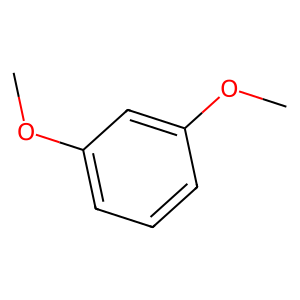

In [2]:
mol = Chem.MolFromSmiles("c1ccc(OC)cc1OC")
Chem.Draw.MolToImage(mol, size=(300,300))

## 子结构搜索HasSubstructMatch(patt)
- quer：需要检索的片段
- recursionPossible: (可选)
- useChirality: 能够在匹配中使用立体化学
- useQueryQueryMatches: 使用查询-查询匹配逻辑

In [3]:
mol.HasSubstructMatch?

Docstring:
HasSubstructMatch( (Mol)self, (Mol)query [, (bool)recursionPossible=True [, (bool)useChirality=False [, (bool)useQueryQueryMatches=False]]]) -> bool :
    Queries whether or not the molecule contains a particular substructure.
    
      ARGUMENTS:
        - query: a Molecule
    
        - recursionPossible: (optional)
    
        - useChirality: enables the use of stereochemistry in the matching
    
        - useQueryQueryMatches: use query-query matching logic
    
      RETURNS: True or False
    

    C++ signature :
        bool HasSubstructMatch(RDKit::ROMol,RDKit::ROMol [,bool=True [,bool=False [,bool=False]]])

HasSubstructMatch( (Mol)self, (MolBundle)query [, (bool)recursionPossible=True [, (bool)useChirality=False [, (bool)useQueryQueryMatches=False]]]) -> bool :

    C++ signature :
        bool HasSubstructMatch(RDKit::ROMol,RDKit::MolBundle [,bool=True [,bool=False [,bool=False]]])

HasSubstructMatch( (Mol)self, (Mol)query, (SubstructMatchParameters)params) -

In [4]:
patt = Chem.MolFromSmarts("OC") # # 导入甲氧基子结构
flag = mol.HasSubstructMatch(patt)
if flag:
    print("molecu m contains group -OCH3")
else:
    print("molecu m don't contain group -OCH3")

molecu m contains group -OCH3


## 得到子结构序列GetSubstructMatch
- `query`: 需要查询的分子     
- `useChirality`: 能够在匹配中使用立体化学            
- `useQueryQueryMatches`: 使用查询-查询匹配逻辑        

In [5]:
mol.GetSubstructMatch?

Signature: mol.GetSubstructMatch(query, *args, **kwargs)
Docstring:
GetSubstructMatch( (Mol)self, (Mol)query [, (bool)useChirality=False [, (bool)useQueryQueryMatches=False]]) -> object :
    Returns the indices of the molecule's atoms that match a substructure query.
    
      ARGUMENTS:
        - query: a Molecule
    
        - useChirality: enables the use of stereochemistry in the matching
    
        - useQueryQueryMatches: use query-query matching logic
    
      RETURNS: a tuple of integers
    
      NOTES:
         - only a single match is returned
         - the ordering of the indices corresponds to the atom ordering
             in the query. For example, the first index is for the atom in
             this molecule that matches the first atom in the query.
    

    C++ signature :
        _object* GetSubstructMatch(RDKit::ROMol,RDKit::ROMol [,bool=False [,bool=False]])

GetSubstructMatch( (Mol)self, (MolBundle)query [, (bool)useChirality=False [, (bool)useQueryQueryMa

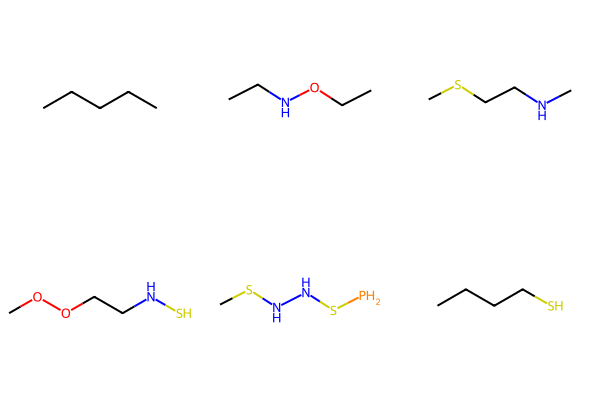

In [6]:
smiles_list= ['CCCCC', 'CCNOCC', 'CSCCNC', 'COOCCNS', 'CSNNSP', 'CCCCS']
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
Chem.Draw.MolsToGridImage(mol_list)

((0, 3), (1, 2), (4, 3), (16, 17), (18, 19))


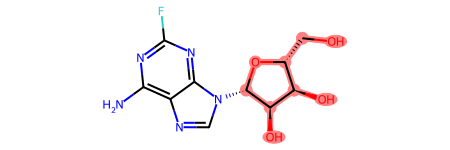

In [3]:
m = Chem.MolFromSmiles('[H][C@]1(CO)O[C@@]([H])(N2C=NC3=C(N)N=C(F)N=C23)[C@]([H])(O)[C@]1([H])O')
substructure = Chem.MolFromSmarts('CO')
print(m.GetSubstructMatches(substructure))
m 

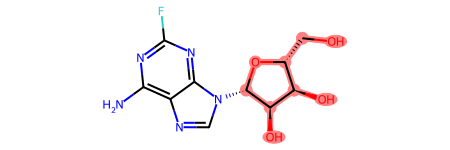

In [9]:
m.__sssAtoms = [0,1,2,3,4,16,17,18,19]
m

In [19]:
## 匹配特定模式的分子
query = Chem.MolFromSmarts('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
print(match_list)


[(0, 1, 2), (), (0, 1, 2), (), (), (0, 1, 2)]


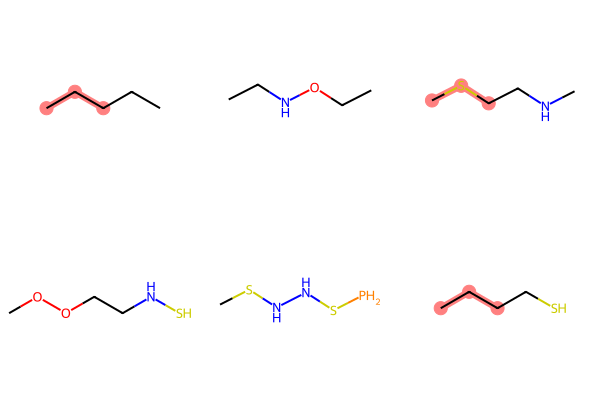

In [20]:
Chem.Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=match_list, molsPerRow=3)

## 删除子结构AllChem.DeleteSubstructs(m,patt)
- mol: 需要修饰的分子
- query: 要用作子结构查询的分子
- onlyFrags: （可选）如果设置了此切换，则只有在查询匹配原子所在的整个片段时，才会删除原子。默认值为0（删除原子，无论整个片段是否匹配）
- useChirality:（可选）使用手性匹配子结构查询

In [9]:
AllChem.DeleteSubstructs?

Docstring:
DeleteSubstructs( (Mol)mol, (Mol)query [, (bool)onlyFrags=False [, (bool)useChirality=False]]) -> Mol :
    Removes atoms matching a substructure query from a molecule
    
      ARGUMENTS:
    
        - mol: the molecule to be modified
    
        - query: the molecule to be used as a substructure query
    
        - onlyFrags: (optional) if this toggle is set, atoms will only be removed if
          the entire fragment in which they are found is matched by the query.
          See below for examples.
          Default value is 0 (remove the atoms whether or not the entire fragment matches)
    
        - useChirality: (optional) match the substructure query using chirality
    
      RETURNS: a new molecule with the substructure removed
    
      NOTES:
    
        - The original molecule is *not* modified.
    
      EXAMPLES:
    
       The following examples substitute SMILES/SMARTS strings for molecules, you'd have
       to actually use molecules:
    
        -

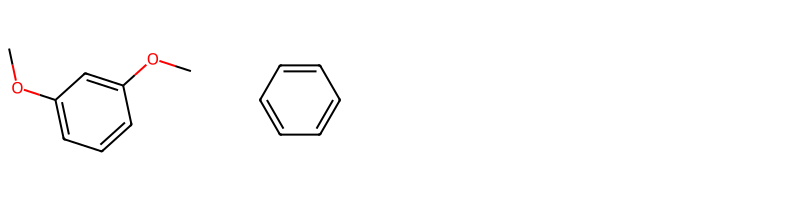

In [10]:
del_mol = AllChem.DeleteSubstructs(mol, patt)
mols = [mol, del_mol]
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200),legends=['' for x in mols])

## 取代基替换`AllChem.ReplaceSubstructs(m, patt, rep)`
- `mol`: 待修饰的分子
- `query`: 要用作子结构查询的分子
- `replacement`: 用作替代物的分子
- `replaceAll`: （可选）如果设置了此切换，则所有子结构匹配,查询将被替换为单个结果，否则每个结果都将包含单独的替代品。
- `replacementConnectionPoint`: （可选）应该与之建立键的置换中原子的索引。
- `useChirality`: （可选）使用手性匹配子结构查询

In [11]:
AllChem.ReplaceSubstructs?

Docstring:
ReplaceSubstructs( (Mol)mol, (Mol)query, (Mol)replacement [, (bool)replaceAll=False [, (int)replacementConnectionPoint=0 [, (bool)useChirality=False]]]) -> object :
    Replaces atoms matching a substructure query in a molecule
    
      ARGUMENTS:
    
        - mol: the molecule to be modified
    
        - query: the molecule to be used as a substructure query
    
        - replacement: the molecule to be used as the replacement
    
        - replaceAll: (optional) if this toggle is set, all substructures matching
          the query will be replaced in a single result, otherwise each result will
          contain a separate replacement.
          Default value is False (return multiple replacements)
        - replacementConnectionPoint: (optional) index of the atom in the replacement that
          the bond should be made to.
        - useChirality: (optional) match the substructure query using chirality
    
      RETURNS: a tuple of new molecules with the substruct

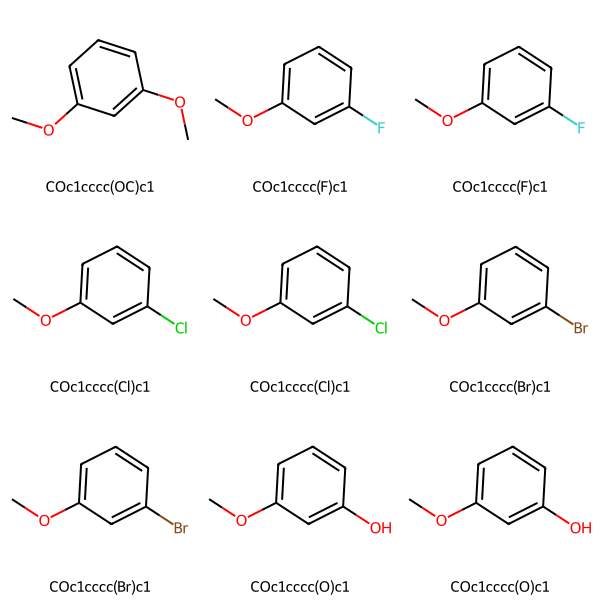

In [14]:
patt = Chem.MolFromSmarts("OC")
repsmis = ['F','Cl','Br','O']
mols = [mol]

for r in repsmis:
    r_mol = Chem.MolFromSmarts(r)
    res = AllChem.ReplaceSubstructs(mol, patt, r_mol)
    mols.extend(res)
    
smis = [Chem.MolToSmiles(mol) for mol in mols]
mols = [Chem.MolFromSmiles(smi) for smi in smis]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=[x for x in smis])

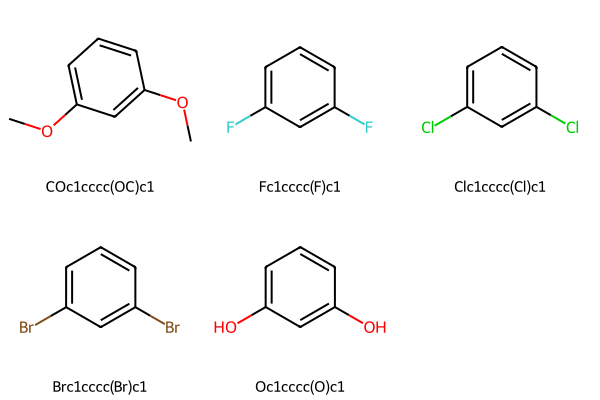

In [15]:
patt = Chem.MolFromSmarts("OC")
repsmis = ['F','Cl','Br','O']
mols = [mol]

for r in repsmis:
    r_mol = Chem.MolFromSmarts(r)
    res = AllChem.ReplaceSubstructs(mol, patt, r_mol, replaceAll=1)
    mols.extend(res)
    
smis = [Chem.MolToSmiles(mol) for mol in mols]
mols = [Chem.MolFromSmiles(smi) for smi in smis]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=[x for x in smis])

## 显示核心结构
`Chem.ReplaceSidechains(m1,core)` : 我们需要定义分子对象，骨架分子； 然后执行`ReplaceSidechains`函数，删除侧链就能得到骨架可视化。

- `mol`: 需要修饰的分子
- `coreQuery`: 用作识别核心的子结构查询的分子
- `useChirality`: （可选）使用手性匹配子结构查询

In [35]:
Chem.ReplaceSidechains?

Docstring:
ReplaceSidechains( (Mol)mol, (Mol)coreQuery [, (bool)useChirality=False]) -> Mol :
    Replaces sidechains in a molecule with dummy atoms for their attachment points.
    
      ARGUMENTS:
    
        - mol: the molecule to be modified
    
        - coreQuery: the molecule to be used as a substructure query for recognizing the core
    
        - useChirality: (optional) match the substructure query using chirality
    
      RETURNS: a new molecule with the sidechains removed
    
      NOTES:
    
        - The original molecule is *not* modified.
    
      EXAMPLES:
    
       The following examples substitute SMILES/SMARTS strings for molecules, you'd have
       to actually use molecules:
    
        - ReplaceSidechains('CCC1CCC1','C1CCC1') -> '[Xa]C1CCC1'
    
        - ReplaceSidechains('CCC1CC1','C1CCC1') -> ''
    
        - ReplaceSidechains('C1CC2C1CCC2','C1CCC1') -> '[Xa]C1CCC1[Xb]'
    
    

    C++ signature :
        RDKit::ROMol* ReplaceSidechains(RDKit

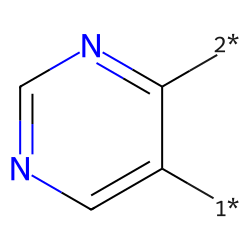

In [41]:
mol = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(mol,core)
Draw.MolToImage(tmp, size=(250,250))

## 显示侧链结构 `Chem.ReplaceCore`
- `mol`: 需要修饰的分子
- `coreQuery`: 用作识别核心的子结构查询的分子
- `matches`: mol.GetSubstractMatch（…）返回的类型的匹配向量
- `replaceDummies`: 切换替换与查询中的虚设匹配的原子
- `labelByIndex`: 切换使用连接到的核心原子的索引标记连接点伪原子。
- `requireDummyMatch`: 如果分子的侧链连接在没有用假人标记的点上，它将被拒绝（返回“None”）

In [42]:
Chem.ReplaceCore?

Docstring:
ReplaceCore( (Mol)mol, (Mol)core, (AtomPairsParameters)matches [, (bool)replaceDummies=True [, (bool)labelByIndex=False [, (bool)requireDummyMatch=False]]]) -> Mol :
    Removes the core of a molecule and labels the sidechains with dummy atoms based on
    The matches indices given in the matching vector matches.
    Calling:
      ReplaceCore(mol,core,mol.GetSubstructMatch(core))
    
      ARGUMENTS:
    
        - mol: the molecule to be modified
    
        - coreQuery: the molecule to be used as a substructure query for recognizing the core
    
        - matches: a matching vector of the type returned by mol.GetSubstructMatch(...)
    
        - replaceDummies: toggles replacement of atoms that match dummies in the query
    
        - labelByIndex: toggles labeling the attachment point dummy atoms with 
          the index of the core atom they're attached to.
    
        - requireDummyMatch: if the molecule has side chains that attach at points not
          flagge

*CCBr.[5*]C(=O)O


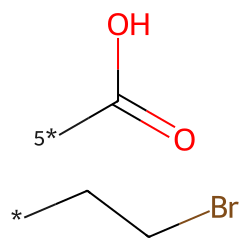

In [46]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceCore(m1, core, labelByIndex=True)
print(tmp)
print(Chem.MolToSmiles(tmp))
Draw.MolToImage(tmp,size=(250,250))



## 分子拆分
### Mol本身为多个分子组成
- `mol`: 要使用的分子
- `asMols`: 可选）如果提供了这一点并且为真，则碎片将作为分子而不是原子id返回。
- `sanitizeFrags`: （可选）如果提供了这一点并且是真的，则碎片分子将在返回之前进行净化。
- `frags`:（可选，默认为None）如果asMols为true，并且这是以空列表的形式提供的，则返回时结果将为mol.GetNumAtoms（）长，并且将包含每个Atom的片段分配
- `fragsMolAtomMapping`: （可选，默认为None）如果asMols为true，并且这是以空列表的形式提供的，则返回时的结果将是numFrags long，并且每个条目都将包含该片段中原子的索引：[（0，1，2，3），（4，5）]

In [47]:
Chem.GetMolFrags?

Docstring:
GetMolFrags( (Mol)mol [, (bool)asMols=False [, (bool)sanitizeFrags=True [, (AtomPairsParameters)frags=None [, (AtomPairsParameters)fragsMolAtomMapping=None]]]]) -> tuple :
    Finds the disconnected fragments from a molecule.
    
      For example, for the molecule 'CC(=O)[O-].[NH3+]C' GetMolFrags() returns
      ((0, 1, 2, 3), (4, 5))
    
      ARGUMENTS:
    
        - mol: the molecule to use
        - asMols: (optional) if this is provided and true, the fragments
          will be returned as molecules instead of atom ids.
        - sanitizeFrags: (optional) if this is provided and true, the fragments
          molecules will be sanitized before returning them.
        - frags: (optional, defaults to None) if asMols is true and this is provided
           as an empty list, the result will be mol.GetNumAtoms() long on return and
           will contain the fragment assignment for each Atom
        - fragsMolAtomMapping: (optional, defaults to None) if asMols is true and

In [48]:
rs = Chem.GetMolFrags(tmp, asMols=True)
print(len(rs))  # 2
smi0 = Chem.MolToSmiles(rs[0])
print(smi0)  # *CCBr
smi1 = Chem.MolToSmiles(rs[1])
print(smi1)  # [5*]C(=O)O


2
*CCBr
[5*]C(=O)O


### 通过分子键拆分骨架`Chem.FragmentOnBonds`
- `mol`:需要修饰的分子
- `bondIndices`: 需要破坏键的索引
- `addDummies`：切换虚设原子的添加以指示键断裂的位置
- `dummyLabels`：用于提供用于假人的标签。每对中的第一个元素是用于替换键的beginAtom的伪元素的标签，第二个元素是用来替换键的endAtom的伪对象的标签。如果未提供，则用原子索引标记假人。
- `bondTypes`： 用于提供在片段和虚设原子之间使用的键类型。如果未提供，则默认为单个。
- `cutsPerAtom`： 用于返回在每个原子上进行的切割次数。

In [52]:
Chem.FragmentOnBonds?

Docstring:
FragmentOnBonds( (Mol)mol, (AtomPairsParameters)bondIndices [, (bool)addDummies=True [, (AtomPairsParameters)dummyLabels=None [, (AtomPairsParameters)bondTypes=None [, (list)cutsPerAtom=[]]]]]) -> Mol :
    Return a new molecule with all specified bonds broken
    
      ARGUMENTS:
    
          - mol            - the molecule to be modified
          - bondIndices    - indices of the bonds to be broken
          - addDummies  - toggles addition of dummy atoms to indicate where 
            bonds were broken
          - dummyLabels - used to provide the labels to be used for the dummies.
            the first element in each pair is the label for the dummy
            that replaces the bond's beginAtom, the second is for the 
            dummy that replaces the bond's endAtom. If not provided, the
            dummies are labeled with atom indices.
          - bondTypes - used to provide the bond type to use between the
            fragments and the dummy atoms. If not provi

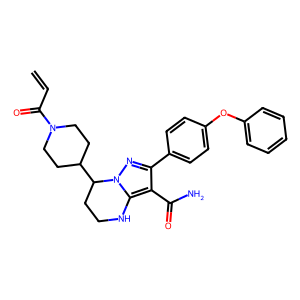

In [50]:
smi='C=CC(=O)N1CCC(CC1)C2CCNC3=C(C(=NN23)C4=CC=C(C=C4)OC5=CC=CC=C5)C(=O)N'
m = Chem.MolFromSmiles(smi)
Draw.MolToImage(m)

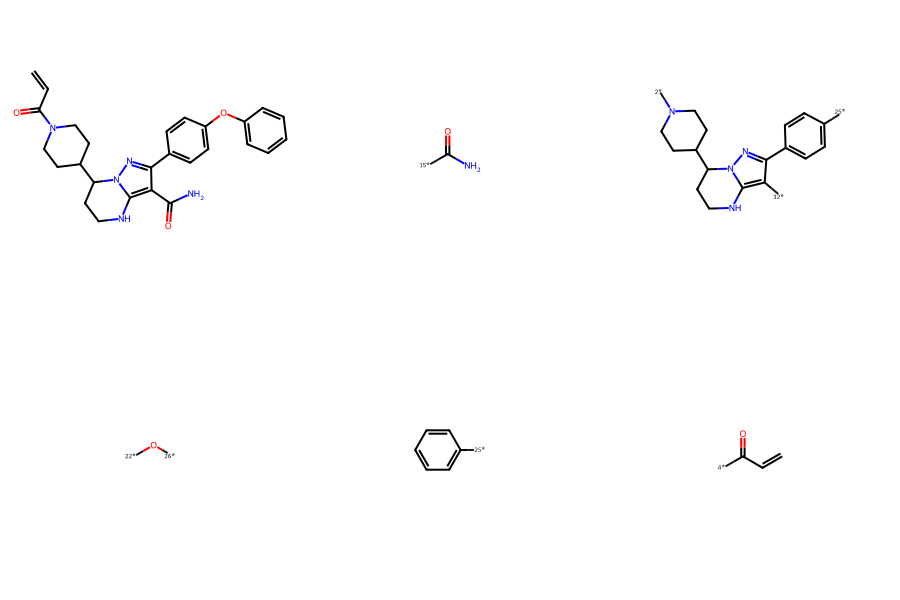

In [55]:
submols = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]')) # R表示环上的原子,即匹配环上和非环上的原子
bonds_id = [m.GetBondBetweenAtoms(x,y).GetIdx() for x, y in submols] # 找到这两个原子之间的键
frags = Chem.FragmentOnBonds(m,bonds_id) # 切割得到碎片
smis= Chem.MolToSmiles(frags)
smis = smis.split('.')
mols=[m]
for smi in smis:
    mols.append(Chem.MolFromSmiles(smi))
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300),legends=['' for x in mols], useSVG=True)

## Murcho分解`MurckoScaffold.GetScaffoldForMol`
把分子中环结构提取出来，然后保留连接环结构的最少的键，如果该结构上的原子是双键连接，则保留双键，得到的结构称为Murcho骨架

In [57]:
MurckoScaffold.GetScaffoldForMol?

Signature: MurckoScaffold.GetScaffoldForMol(mol)
Docstring:
Return molecule object containing scaffold of mol

>>> m = Chem.MolFromSmiles('Cc1ccccc1')
>>> GetScaffoldForMol(m)
<rdkit.Chem.rdchem.Mol object at 0x...>
>>> Chem.MolToSmiles(GetScaffoldForMol(m))
'c1ccccc1'

>>> m = Chem.MolFromSmiles('Cc1cc(Oc2nccc(CCC)c2)ccc1')
>>> Chem.MolToSmiles(GetScaffoldForMol(m))
'c1ccc(Oc2ccccn2)cc1'
File:      ~/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Scaffolds/MurckoScaffold.py
Type:      function


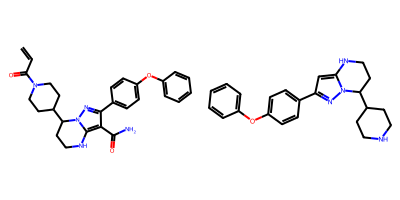

In [58]:
m = Chem.MolFromSmiles('C=CC(=O)N1CCC(CC1)C2CCNC3=C(C(=NN23)C4=CC=C(C=C4)OC5=CC=CC=C5)C(=O)N')
tmp = MurckoScaffold.GetScaffoldForMol(m)
Draw.MolsToImage([m, tmp])

## 反应模板
- `SMARTS`: 反应模版
- `replacements` dict类型,替换字典
- `useSmiles` 是否使用Smile格式

In [21]:
AllChem.ReactionFromSmarts?

Docstring:
ReactionFromSmarts( (str)SMARTS [, (dict)replacements={} [, (bool)useSmiles=False]]) -> ChemicalReaction :
    construct a ChemicalReaction from a reaction SMARTS string. 
    see the documentation for rdkit.Chem.MolFromSmiles for an explanation
    of the replacements argument.

    C++ signature :
        RDKit::ChemicalReaction* ReactionFromSmarts(char const* [,boost::python::dict={} [,bool=False]])
Type:      function


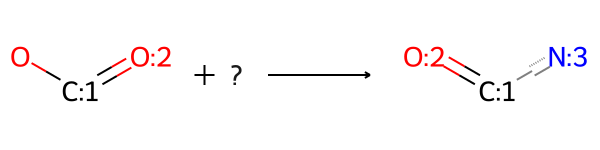

In [28]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]') # 导入反应模板.号分隔了
# 两个反应物在同一个反应物中圆括号表示分支，其中[C:1](=[O:2])-[OD1]表示一个碳上用双键连接一个氧(=[O:2])用单
# 键连接只有一个显示键连的氧([OD1])即羧基。[N!H0:3]表示氮与至少一个氢相连即不饱和氨基。产物[C:1](=[O:2])[N:3]
#即表示酰胺,故该反应即为羧基和氨基生成酰胺的反应。

rxn

执行方法`rxn.RunReactants`
- `reactants` 反应物tuple
- `maxProducts` 最产物量

In [23]:
rxn.RunReactants?

Docstring:
RunReactants( (ChemicalReaction)self, (tuple)reactants [, (int)maxProducts=1000]) -> object :
    apply the reaction to a sequence of reactant molecules and return the products as a tuple of tuples.  If maxProducts is not zero, stop the reaction when maxProducts have been generated [default=1000]

    C++ signature :
        _object* RunReactants(RDKit::ChemicalReaction*,boost::python::tuple [,unsigned int=1000])

RunReactants( (ChemicalReaction)self, (list)reactants [, (int)maxProducts=1000]) -> object :
    apply the reaction to a sequence of reactant molecules and return the products as a tuple of tuples.  If maxProducts is not zero, stop the reaction when maxProducts have been generated [default=1000]

    C++ signature :
        _object* RunReactants(RDKit::ChemicalReaction*,boost::python::list [,unsigned int=1000])
Type:      method


In [25]:
mol1 = Chem.MolFromSmiles('CC(=O)O')
mol2 = Chem.MolFromSmiles('NC')
reactants = (mol1,mol2)
# 得到一个元组，其中第一个索引表示可能发生的反应，反应物有多个反应位点则会被视为有多个反应，第二个索引表示一个反应
# 中生成的不同产物，例如两个物质反应生成两个物质，那么这两个产物会被储存在第二个索引中
ps = rxn.RunReactants(reactants)
print(Chem.MolToSmiles(ps[0][0]))


CNC(C)=O


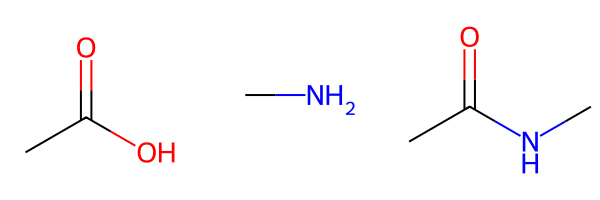

In [26]:
mols = [mol1, mol2, ps[0][0]]
Draw.MolsToGridImage(mols)

### 多个反应位点


In [29]:
mol1 = Chem.MolFromSmiles('C(COC(=O)O)C(=O)O')
mol2 = Chem.MolFromSmiles('NC')
reactants = (mol1,mol2)
ps = rxn.RunReactants(reactants)

print(ps)

((<rdkit.Chem.rdchem.Mol object at 0x7f6890e5b0f0>,), (<rdkit.Chem.rdchem.Mol object at 0x7f6890e5b630>,))


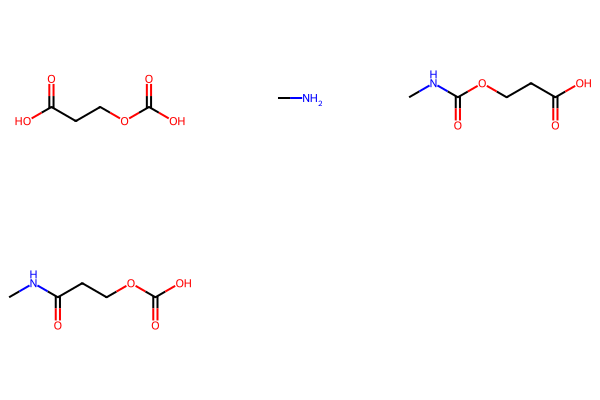

In [30]:
mols = [mol1, mol2, ps[0][0], ps[1][0]]
Draw.MolsToGridImage(mols)

### DA反应

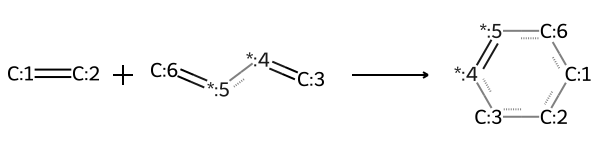

In [31]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1') # 不难看出，
rxn

In [33]:
# 这表示一个DA反应
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
for i in ps:
    print(Chem.MolToSmiles(i[0]))

NC1=CCCC(O)C1
NC1=CCC(O)CC1
NC1=CCC(O)CC1
NC1=CCCC(O)C1


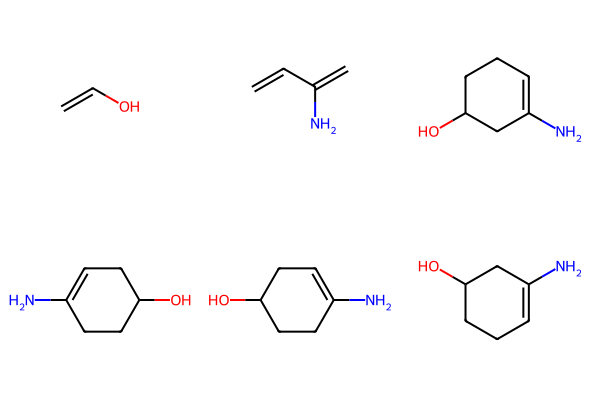

In [34]:
mols = [Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C'), ps[0][0], ps[1][0], ps[2][0], ps[3][0]]
Draw.MolsToGridImage(mols)